# Analysis of Kinetic Energy for NATL60 Model.

# 0 - Load modules and define functions

In [1]:
import sys
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [2]:
sys.path.insert(0,'/Users/adekunle/lib/python/regular/')
sys.path.insert(0,'/Users/adekunle/lib/python/Eddy_DectTrack_NATL60/')

In [3]:
import Plot_PowerSpec as pp
import plot_box as pb
from natl60_10_by_10_boxes import boxes

In [4]:
N60_database = '/Users/adekunle/Data/WaveSpecResults/NATL60_10_by_10_boxes/'

In [5]:
def mean_pspec(filenames,i,j):
    ''' Compute mean spectrum'''
    _pspec = []
    for filename in filenames:
        spec = np.load(filename)
        kspec = spec['kspec'];
        pspec = spec['KEspec'];
        _pspec.append(pspec) 
    pspec_ar = np.array(_pspec)
    mean_pspec = pspec_ar[i:j].mean(axis=0)
    return kspec,mean_pspec

In [6]:
def comp_slope(database,i,j):
    ''' Compute slope of avearged spectrum'''
    slope_10_100 = []
    slope_70_250 = []
    for box in boxes:
        filenames = sorted(glob.glob(database + 'KEspec/WaveSpec_'+box.name+'_KEspec_*.npz'))
        kpsec,pspec = mean_pspec(filenames,i,j)
        m1 = pp.get_slope(kpsec,pspec,10*1E3,100*1E3)
        m2 = pp.get_slope(kpsec,pspec,70*1E3,250*1E3)
        slope_10_100.append(m1)
        slope_70_250.append(m2)
    slope_10_100_arr = np.array(slope_10_100)
    slope_70_250_arr = np.array(slope_70_250)
    return slope_10_100_arr,slope_70_250_arr

In [7]:
# - general slope
k = np.array([1E-6,1E-3])
s3 = k**-3/1.e11
s2 = k**-2/1.e7
s53 = k**(-5./3.)/1.e5

# 1 - Annual Mean

## 1.1 - Annual Mean of KE spectrum

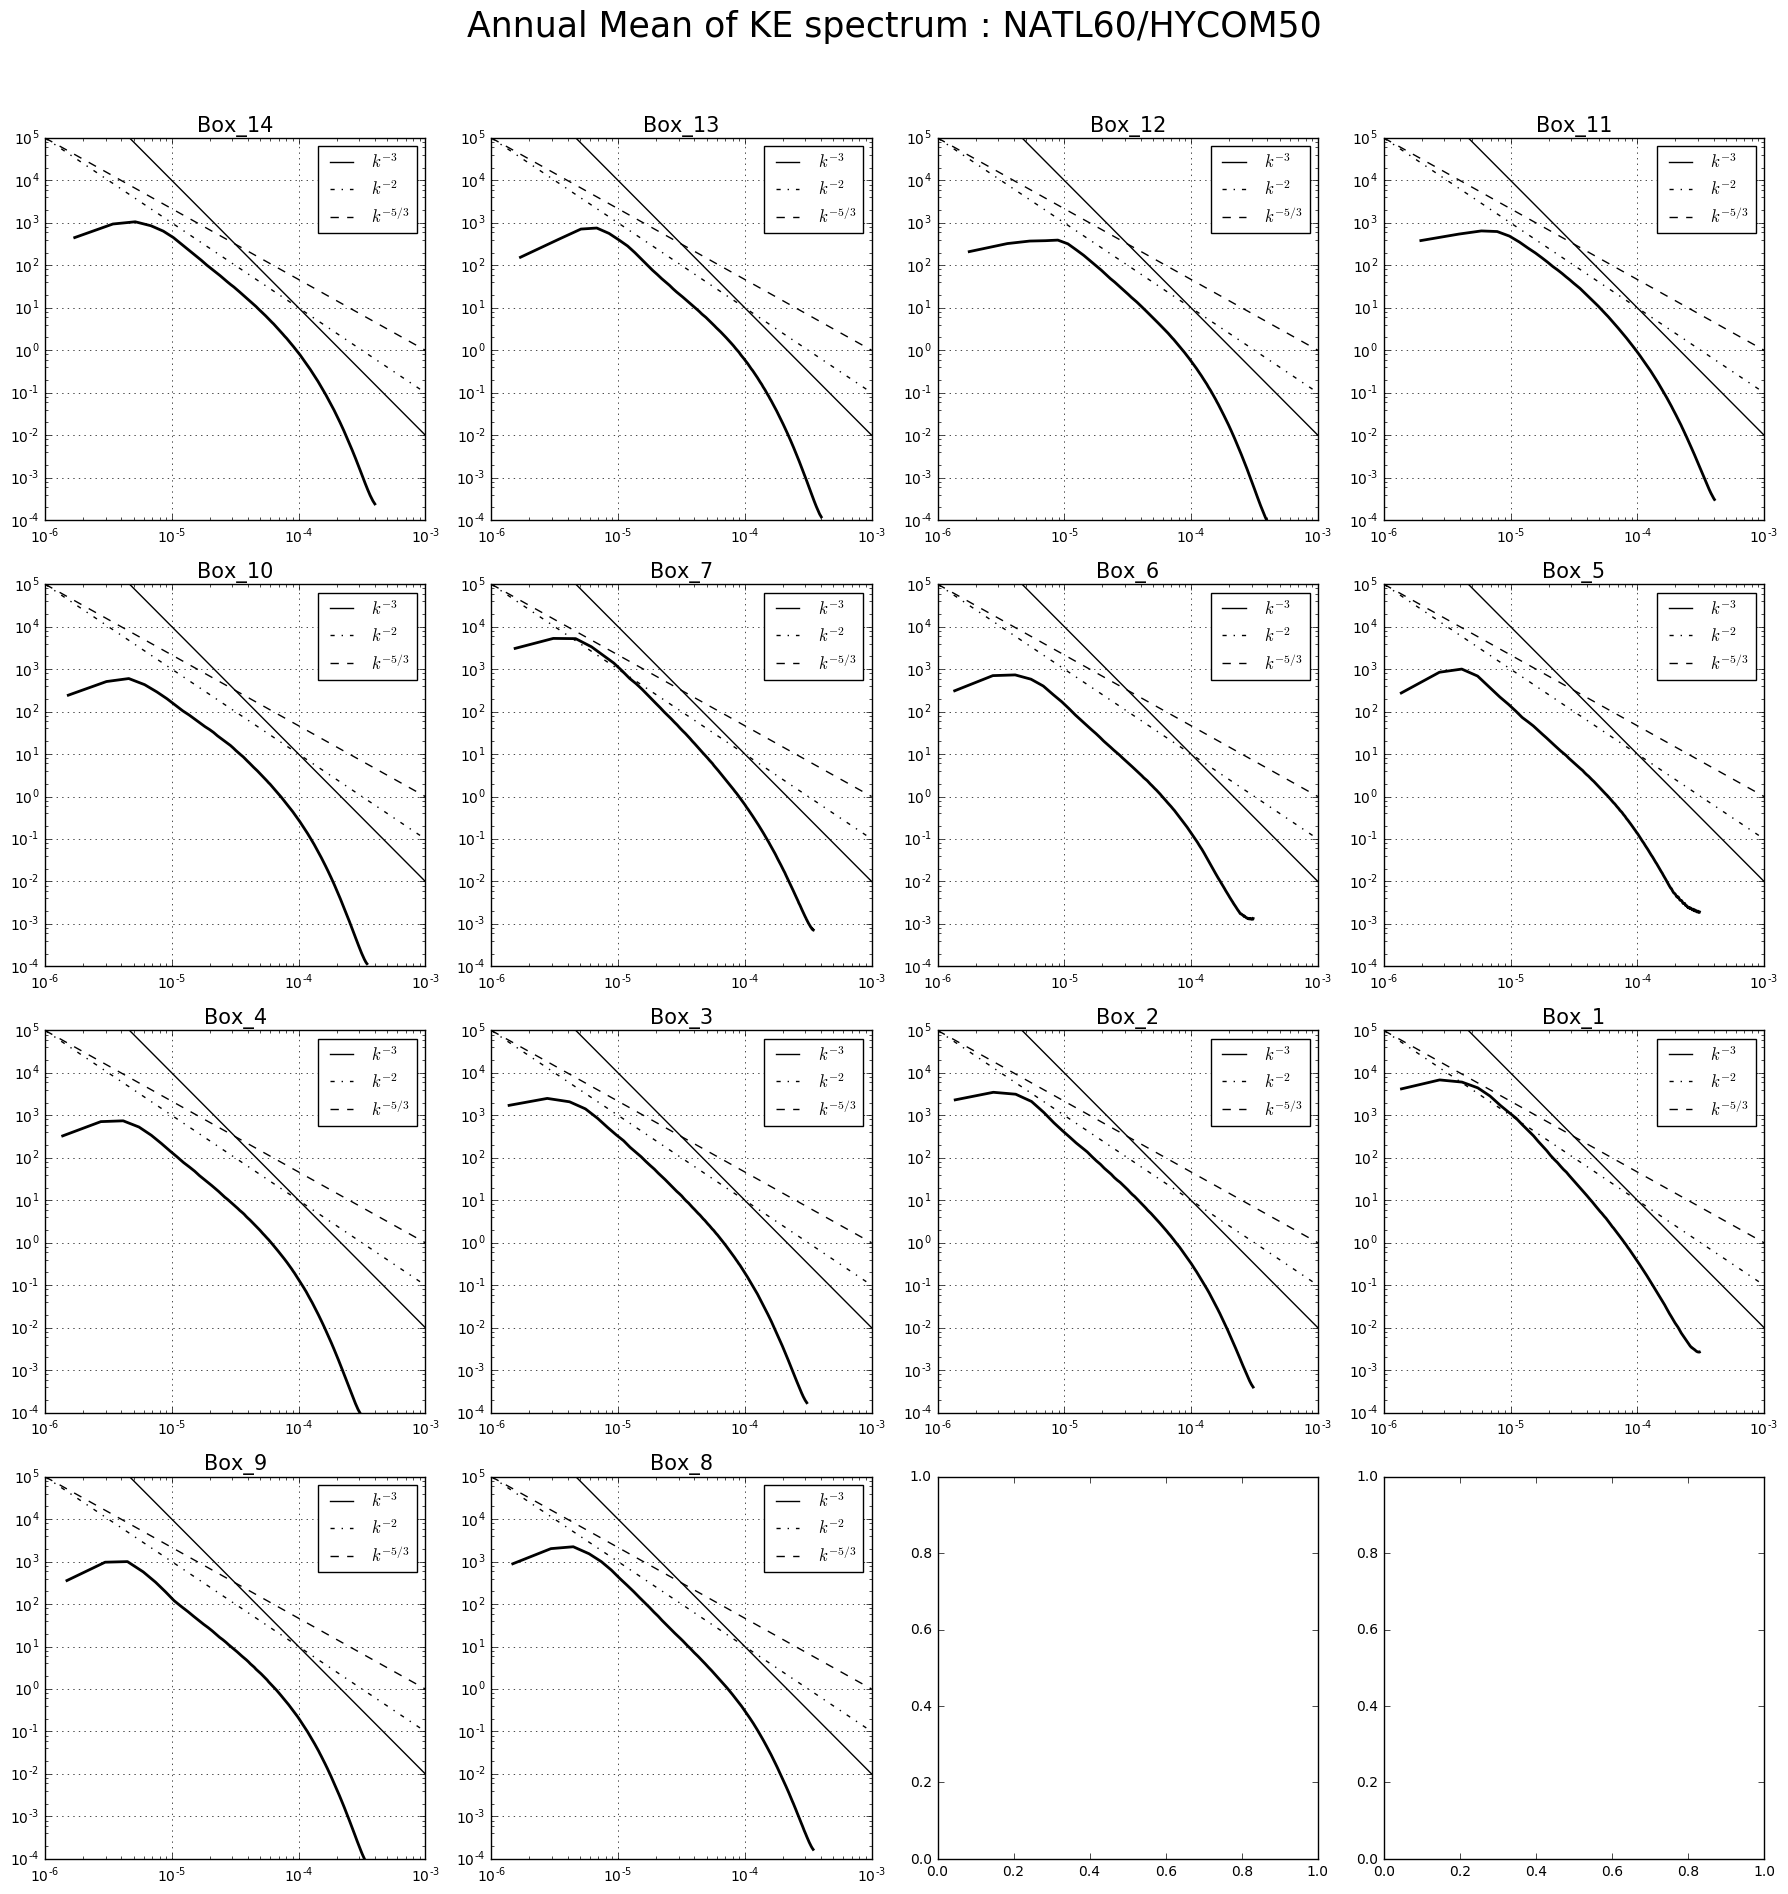

In [8]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Annual Mean of KE spectrum : NATL60/HYCOM50'
plt.suptitle(title,size = 25,y=1.05)

i = 0
for box in boxes:
    N60_filenames = sorted(glob.glob(N60_database + 'KEspec/WaveSpec_'+box.name+'_KEspec_*.npz'))
    N60_kpsec,N60_pspec = mean_pspec(N60_filenames,0,12)
    axs[i].loglog(N60_kpsec,N60_pspec,'k',linewidth=2.0)
    axs[i].loglog(k,s3,'k-',label=r'$k^{-3}$')
    axs[i].loglog(k,s2,'k-.',label=r'$k^{-2}$')
    axs[i].loglog(k,s53,'k--',label=r'$k^{-5/3}$')
    axs[i].set_xlim(1E-6,1E-3)
    axs[i].set_ylim(1E-4,1E5)
    axs[i].set_title(box.name,size=15)
    axs[i].legend()
    axs[i].grid(True)
    i = i + 1
    fig.tight_layout()

In [9]:
N60_slope_10_100_arr,N60_slope_70_250_arr = comp_slope(N60_database,0,12)

In [10]:
for kk,box in enumerate(boxes):
    box.str_N60_slope_10_100 = "{:1.1f}".format(N60_slope_10_100_arr[kk])
    box.str_N60_slope_70_250 = "{:1.1f}".format(N60_slope_70_250_arr[kk])

## 1.2 - Slope in the range 10km - 100km and 70km - 250km.

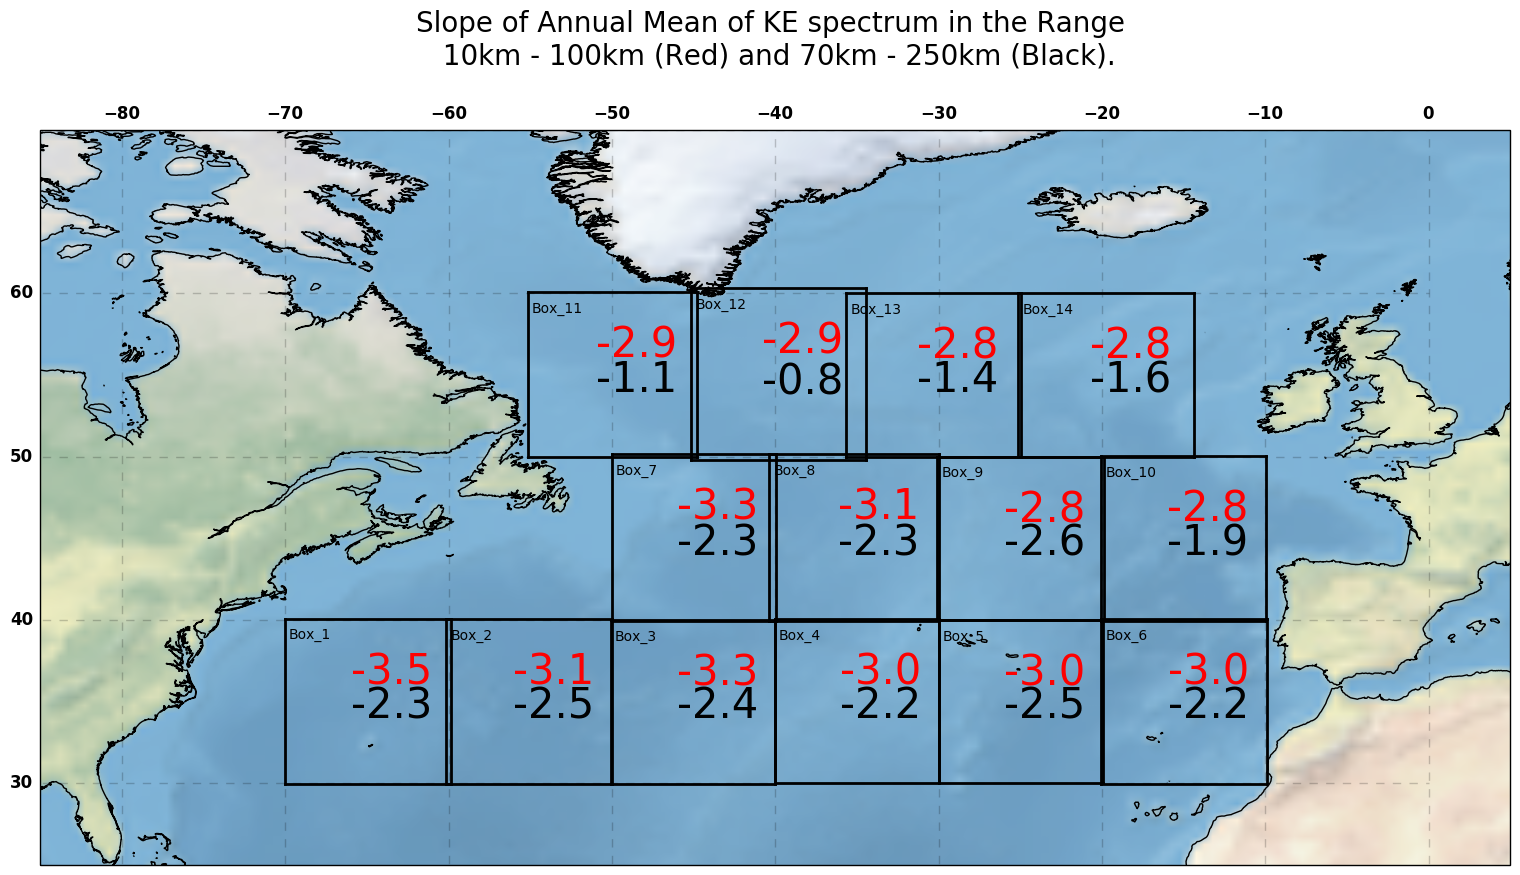

In [11]:
title = 'Slope of Annual Mean of KE spectrum in the Range \n 10km - 100km (Red) and 70km - 250km (Black).'
pb.plot_two_boxes_attribute(boxes,'str_N60_slope_10_100','str_N60_slope_70_250',title=title,fontsize=30)

# 2 - Model Seasonality

## 2.1 - Winter/Summer Mean of KE Spectrum

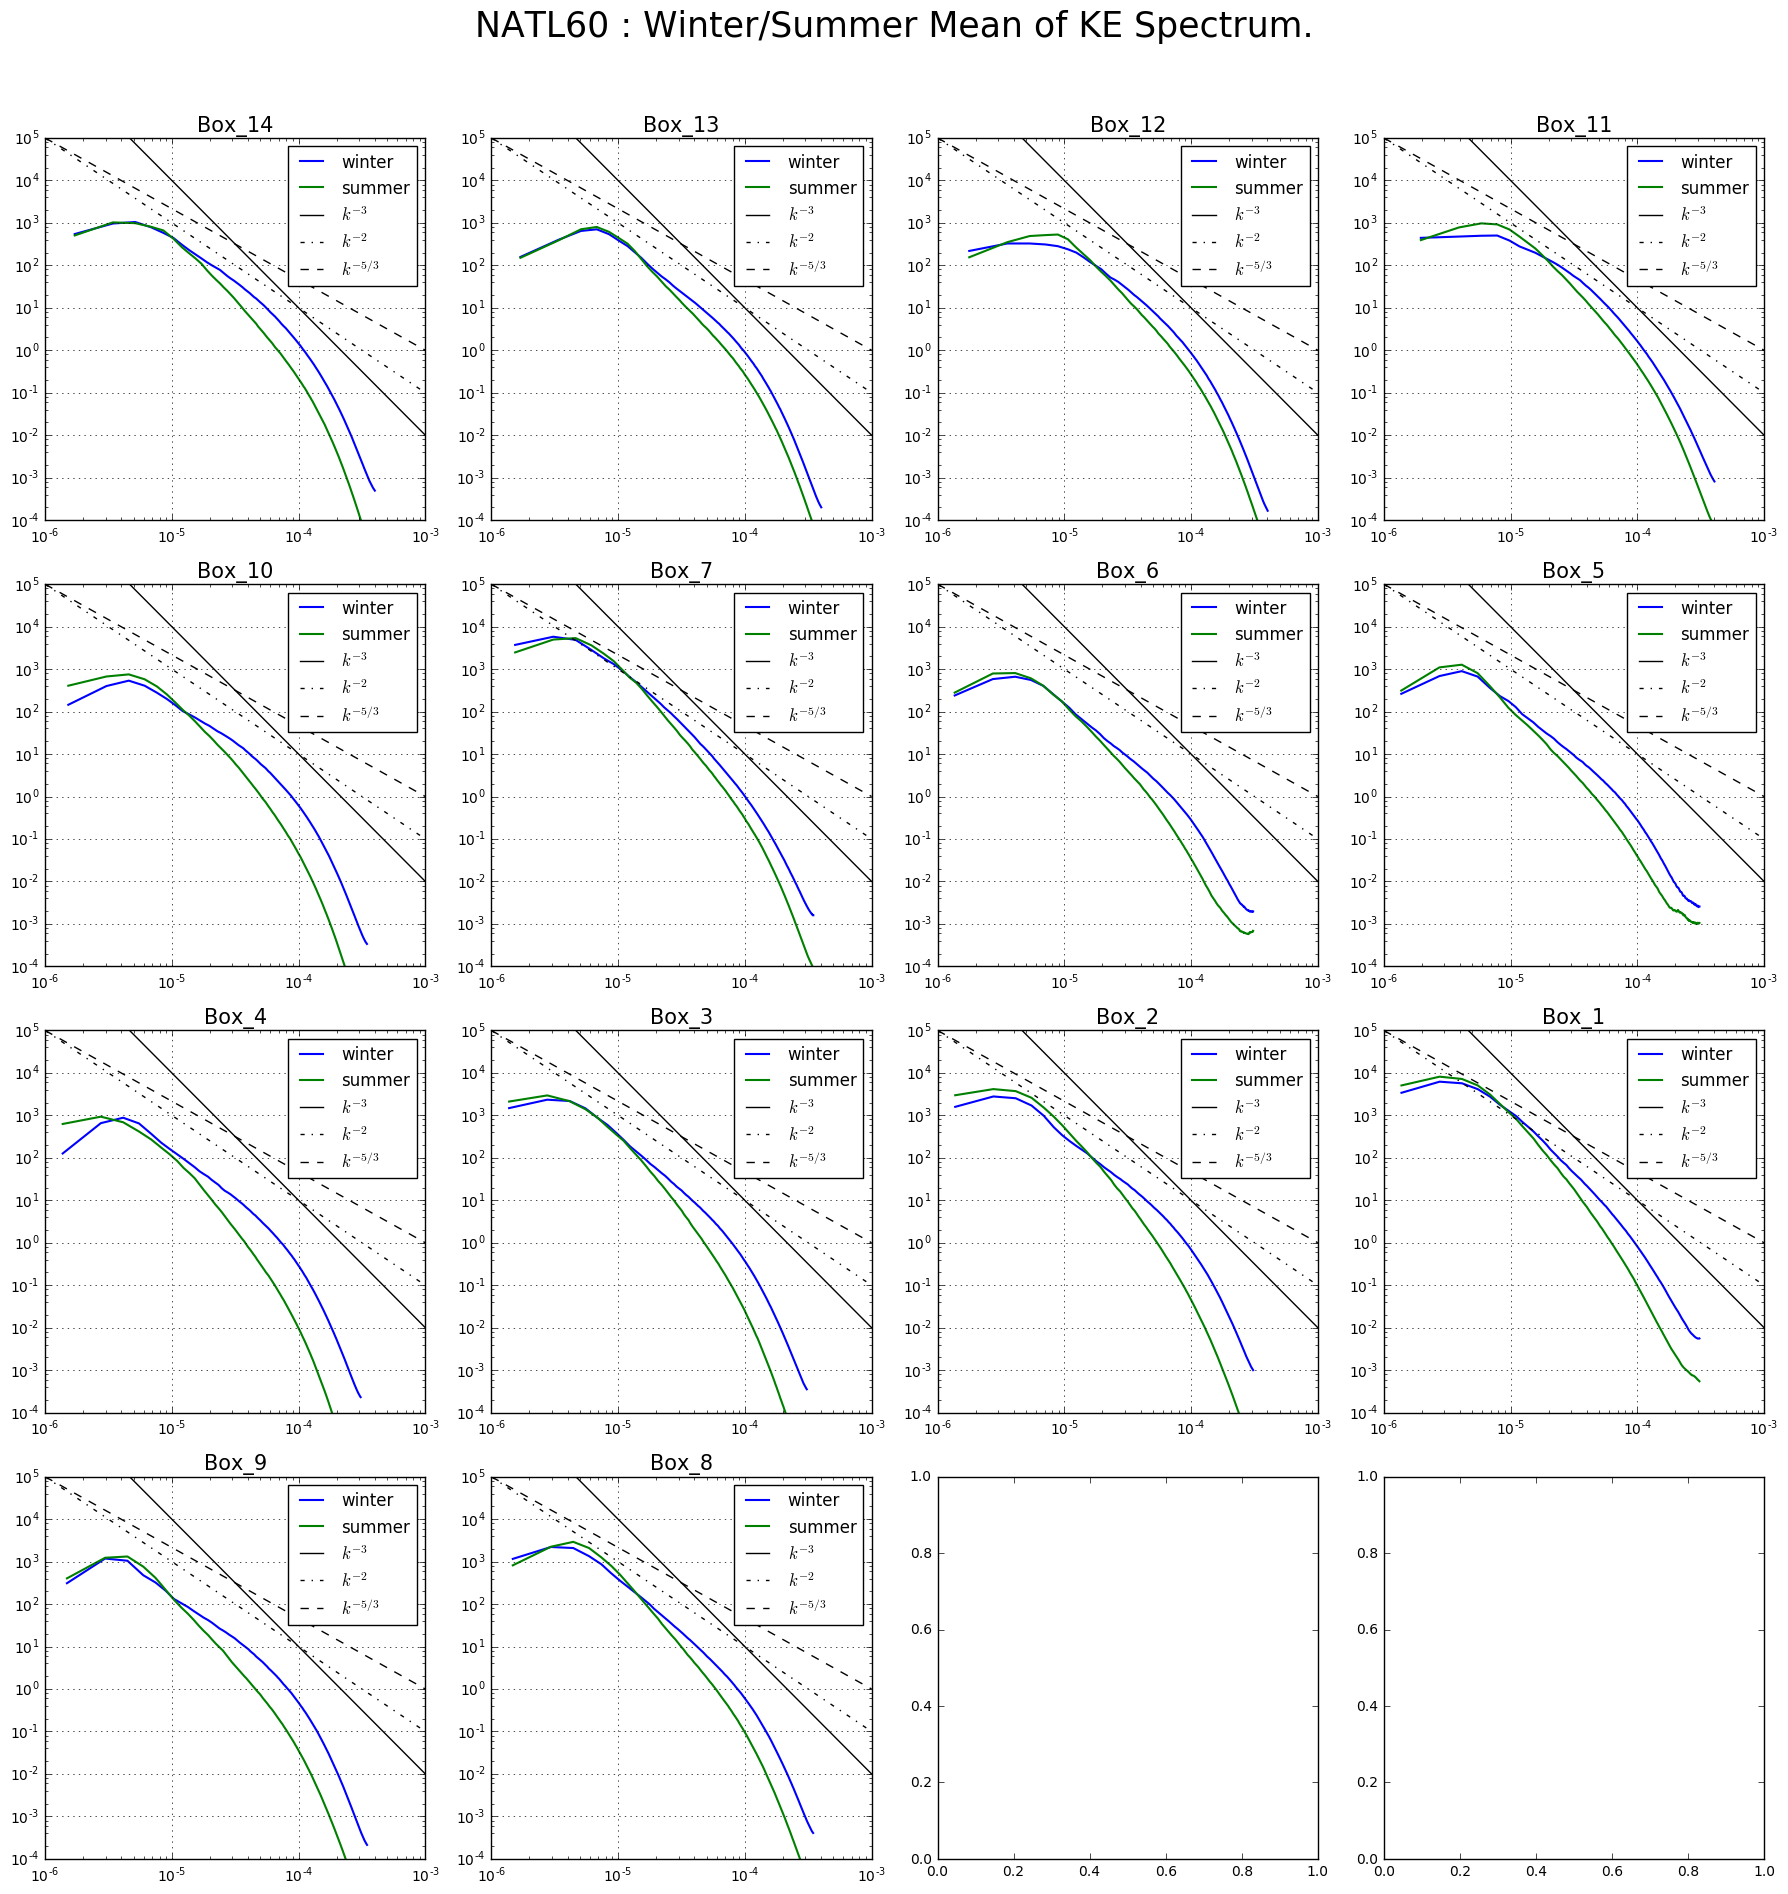

In [12]:
#ij = np.array([0,31,60,91,121,152,182,213,244,274,305,335,366])
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'NATL60 : Winter/Summer Mean of KE Spectrum.'
plt.suptitle(title,size = 25,y=1.05)

i = 0
for box in boxes:
    N60_filenames = sorted(glob.glob(N60_database + 'KEspec/WaveSpec_'+box.name+'_KEspec_*.npz'))
    winter_kpsec,winter_pspec = mean_pspec(N60_filenames,3,6)
    summer_kpsec,summer_pspec = mean_pspec(N60_filenames,9,12)
    axs[i].loglog(winter_kpsec,winter_pspec,linewidth=1.5,label='winter')
    axs[i].loglog(summer_kpsec,summer_pspec,linewidth=1.5,label='summer')
    axs[i].loglog(k,s3,'k-',label=r'$k^{-3}$')
    axs[i].loglog(k,s2,'k-.',label=r'$k^{-2}$')
    axs[i].loglog(k,s53,'k--',label=r'$k^{-5/3}$')
    axs[i].set_xlim(1E-6,1E-3)
    axs[i].set_ylim(1E-4,1E5)
    axs[i].set_title(box.name,size=15)
    axs[i].legend()
    axs[i].grid(True)
    i = i + 1
    fig.tight_layout()

In [13]:
N60_winter_slope_10_100_arr,N60_winter_slope_70_250_arr = comp_slope(N60_database,3,6)
N60_summer_slope_10_100_arr,N60_summer_slope_70_250_arr = comp_slope(N60_database,9,12)

In [14]:
for kk,box in enumerate(boxes):
    box.str_N60_winter_slope_10_100 = "{:1.1f}".format(N60_winter_slope_10_100_arr[kk])
    box.str_N60_summer_slope_10_100 = "{:1.1f}".format(N60_summer_slope_10_100_arr[kk])
    
    box.str_N60_winter_slope_70_250 = "{:1.1f}".format(N60_winter_slope_70_250_arr[kk])
    box.str_N60_summer_slope_70_250 = "{:1.1f}".format(N60_summer_slope_70_250_arr[kk])

### 2.2 - Slope of KE spectrum in the Range 10km - 100km.

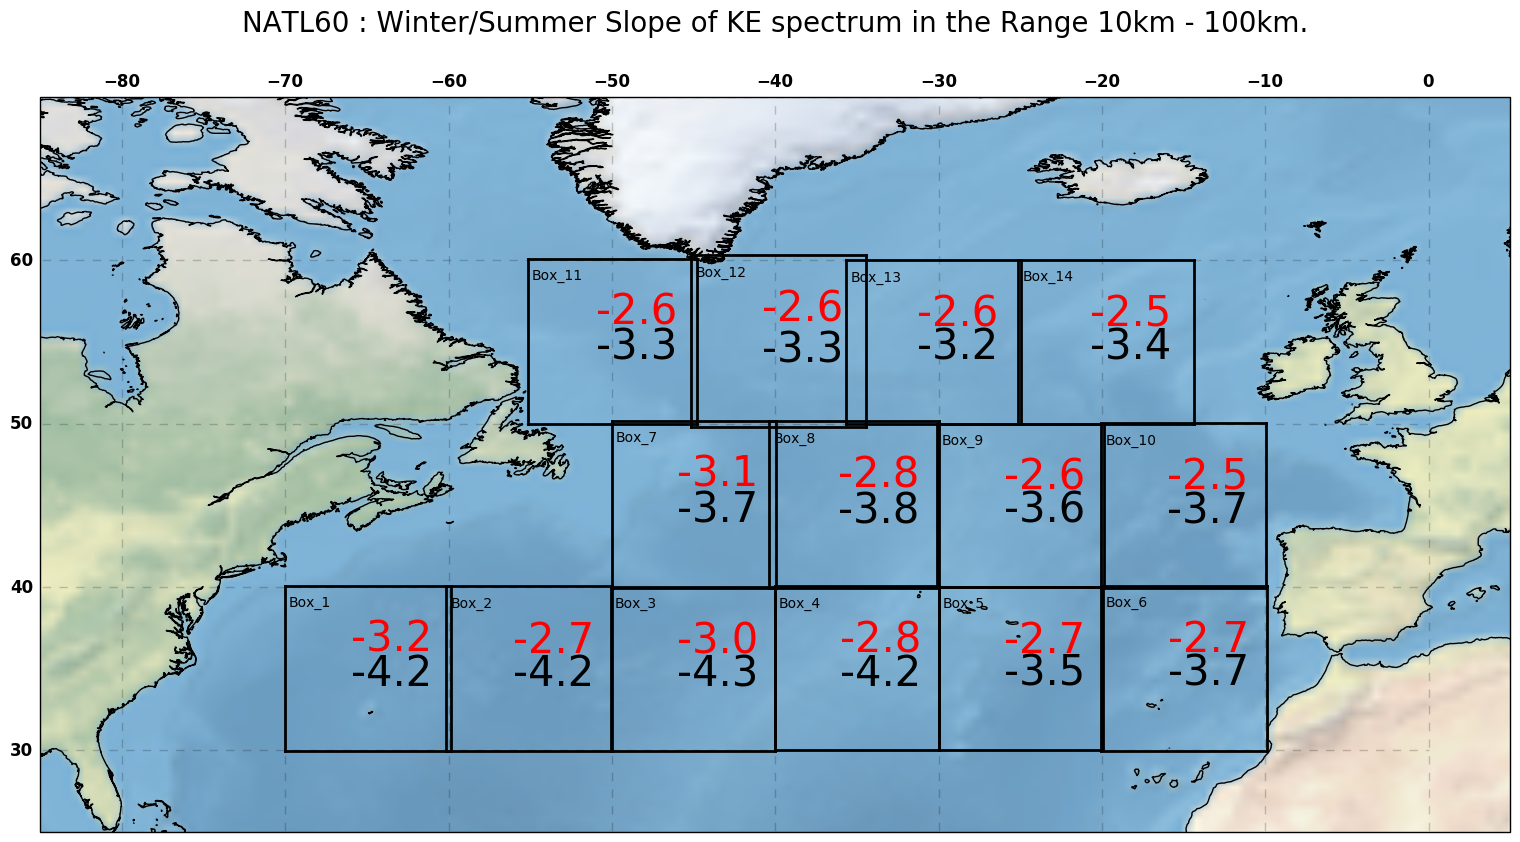

In [15]:
title = 'NATL60 : Winter/Summer Slope of KE spectrum in the Range 10km - 100km.'
pb.plot_two_boxes_attribute(boxes,'str_N60_winter_slope_10_100','str_N60_summer_slope_10_100',title=title,fontsize=30)

## 2.3 - Slope of KE spectrum in the Range 70km - 250km.

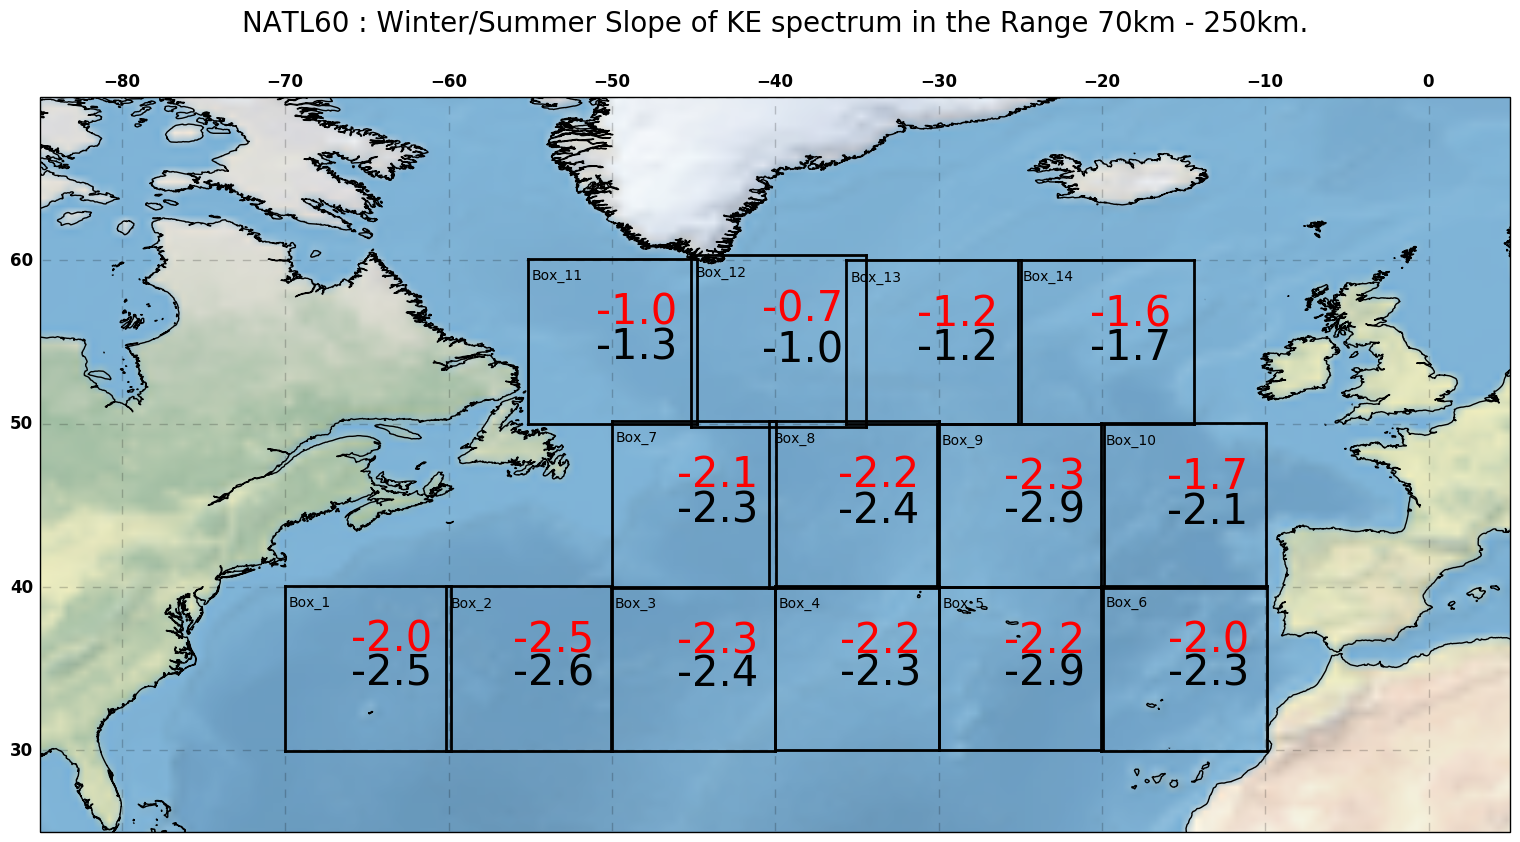

In [16]:
title = 'NATL60 : Winter/Summer Slope of KE spectrum in the Range 70km - 250km.'
pb.plot_two_boxes_attribute(boxes,'str_N60_winter_slope_70_250','str_N60_summer_slope_70_250',title=title,fontsize=30)